# Moscow's Taste: Venue Analysis and Recommendations for Investors

## Project Goals
The goal of this project is to perform an exploratory data analysis of the public food venue market in Moscow to help investors from the "Shut Up and Take My Money" fund choose the optimal location, format, and price category for their future establishment. To achieve this, we will study the current market landscape, identify popular types of venues, analyze their distribution across districts, and reveal key patterns influencing business success.

## Work Plan

The work will start with loading the data and getting familiar with it to understand its structure, check for missing values, duplicates, and mistakes, and then combine the two datasets into one. After that, we will clean the data: change data types to the correct format, handle missing values, remove duplicates, and add new columns, like a feature showing if a place is open 24/7.

Then we will do exploratory analysis, where we will look at how venues are spread across categories and districts, find out the ratio of chain and non-chain places, and analyze the number of seats and their ratings. We will also find out which venues are more likely to be part of a chain, how ratings are different across categories, what things can affect them, and which places are the most popular in Moscow.

## Data Description:

We have a dataset with public food places in Moscow, based on data from Yandex Maps and Yandex Business from summer 2022. The information on Yandex Business could have been added by users or found from open sources.

There are two data files:

The file `/datasets/rest_info.csv` contains information about food places:
* `name` — name of the place;
* `address` — address of the place;
* `district` — the administrative district where the place is located, for example, Central Administrative District;
* `category` — type of place, like "cafe", "pizzeria", or "coffee shop";
* `hours` — information about working days and hours;
* `rating` — user rating of the place on Yandex Maps (maximum rating is 5.0);
* `chain` — number (0 or 1) showing whether the place is part of a chain (there may be some mistakes for small chains):
- 0 — the place is not part of a chain;
- 1 — the place is part of a chain.
* `seats` — number of available seats.

The file `/datasets/rest_price.csv` contains information about the average bill in food places:
* `price` — price category, for example "average", "below average", "above average", and so on;
* `avg_bill` — a string that shows the average bill as a range, for example:
  "Average bill: 1000–1500 ₽";  
  "Cappuccino price: 130–220 ₽";  
  "Beer glass price: 400–600 ₽";  
  and so on;
* `middle_avg_bill` — a number showing the estimated average bill, used only for values in the `avg_bill` column that start with "Average bill":
  - If the string has a price range, the column shows the median of the two values.  
  - If it has just one number (not a range), that number is used.  
  - If there is no value or it doesn’t start with "Average bill", the column is empty.
* `middle_coffee_cup` — a number showing the estimated price for one cup of cappuccino, used only for values in the `avg_bill` column that start with "Cappuccino price":
  - If the string has a price range, the column shows the median of the two values.  
  - If it has just one number (not a range), that number is used.  
  - If there is no value or it doesn’t start with "Cappuccino price", the column is empty.


## **Step 1. Loading the data and getting familiar with it**

Let's start by loading the libraries and the datasets `/datasets/rest_info.csv` and `/datasets/rest_price.csv`.  
We will use pandas and data visualization libraries matplotlib and seaborn, and also phik to build a correlation matrix.  
The data from the files will be saved into two variables: `rest_df` and `price_df`.

In [6]:
# Import libraries for data handling 
import pandas as pd

# Import libraries for visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Load the library for calculating the phi_k correlation coefficient
from phik import phik_matrix

In [7]:
# Load the data
rest_df = pd.read_csv('https://code.s3.yandex.net/datasets/rest_info.csv')
price_df = pd.read_csv('https://code.s3.yandex.net/datasets/rest_price.csv')

Let’s take a look at the data from the `/datasets/rest_info.csv` dataset — we’ll show the first rows using the `head()` method, and get info about the dataframe using the `info()` method.

In [9]:
rest_df.head()

,id,name,category,address,district,hours,rating,chain,seats
0,0c3e3439a8c64ea5bf6ecd6ca6ae19f0,WoWфли,кафе,"Москва, улица Дыбенко, 7/1",Северный административный округ,"ежедневно, 10:00–22:00",5.0,0,NaN
1,045780ada3474c57a2112e505d74b633,Четыре комнаты,ресторан,"Москва, улица Дыбенко, 36, корп. 1",Северный административный округ,"ежедневно, 10:00–22:00",4.5,0,4.0
2,1070b6b59144425896c65889347fcff6,Хазри,кафе,"Москва, Клязьминская улица, 15",Северный административный округ,"пн-чт 11:00–02:00; пт,сб 11:00–05:00; вс 11:00...",4.6,0,45.0
3,03ac7cd772104f65b58b349dc59f03ee,Dormouse Coffee Shop,кофейня,"Москва, улица Маршала Федоренко, 12",Северный административный округ,"ежедневно, 09:00–22:00",5.0,0,NaN
4,a163aada139c4c7f87b0b1c0b466a50f,Иль Марко,пиццерия,"Москва, Правобережная улица, 1Б",Северный административный округ,"ежедневно, 10:00–22:00",5.0,1,148.0


In [10]:
rest_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8406 entries, 0 to 8405
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        8406 non-null   object 
 1   name      8406 non-null   object 
 2   category  8406 non-null   object 
 3   address   8406 non-null   object 
 4   district  8406 non-null   object 
 5   hours     7870 non-null   object 
 6   rating    8406 non-null   float64
 7   chain     8406 non-null   int64  
 8   seats     4795 non-null   float64
dtypes: float64(2), int64(1), object(6)
memory usage: 591.2+ KB


The `/datasets/rest_info.csv` dataset contains 9 columns and 8,406 rows with information about public food venues.

**from the first look at the data, we can make the following observations:**

* The column names don’t need to be converted to snake_case, since all letters are already lowercase and the names consist of single words.
* Only three columns contain numeric data. All values are stored in the correct data types, but the `chain` column only has bool values (1s and 0s) — this could be optimized in terms of memory usage.
* Missing values are only found in the `hours` and `seats` columns. However, we should also check the other columns — they might contain special indicator values that mean data is missing.
* From the first look, the values in the columns seem to match their descriptions.

In the same way, let’s take a look at the data from the `/datasets/rest_price.csv` dataset.


In [13]:
price_df.head()

,id,price,avg_bill,middle_avg_bill,middle_coffee_cup
0,045780ada3474c57a2112e505d74b633,выше среднего,Средний счёт:1500–1600 ₽,1550.0,NaN
1,1070b6b59144425896c65889347fcff6,средние,Средний счёт:от 1000 ₽,1000.0,NaN
2,03ac7cd772104f65b58b349dc59f03ee,NaN,Цена чашки капучино:155–185 ₽,NaN,170.0
3,a163aada139c4c7f87b0b1c0b466a50f,средние,Средний счёт:400–600 ₽,500.0,NaN
4,8a343546b24e4a499ad96eb7d0797a8a,средние,NaN,NaN,NaN


In [14]:
price_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4058 entries, 0 to 4057
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 4058 non-null   object 
 1   price              3315 non-null   object 
 2   avg_bill           3816 non-null   object 
 3   middle_avg_bill    3149 non-null   float64
 4   middle_coffee_cup  535 non-null    float64
dtypes: float64(2), object(3)
memory usage: 158.6+ KB


The `/datasets/rest_price.csv` dataset contains 5 columns and 4,058 rows with information about prices in public food venues.

**After an initial look at the data, we can make the following observations:**

* The column names are already in snake_case.
* Only two columns contain numeric data. All values are stored in the correct data types.
* Missing values are present in all columns except for the `id` column.
* From the first look, the values in the columns seem to match their descriptions.

Since the data description mentions that the information in the dataset could have been added by users or found in public sources, the missing values are not too suspicious. However, we should keep them in mind for later analysis.

#### Preparing a merged dataframe

Since the task requires a full analysis of all venues, we will combine our datasets into one dataframe to make further work easier. Since we are analyzing venues, not prices, we will join the data while keeping all values from the `/datasets/rest_info.csv` dataset.

We’ll merge the data using the parameter `how='left'`. This will allow us to join the `price_df` dataframe to `rest_df` without losing any data from `rest_df`.


In [17]:
#Merging datasets
df = rest_df.merge(price_df, on = 'id', how = 'left')

In [18]:
#Checking the information about our merged dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8406 entries, 0 to 8405
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 8406 non-null   object 
 1   name               8406 non-null   object 
 2   category           8406 non-null   object 
 3   address            8406 non-null   object 
 4   district           8406 non-null   object 
 5   hours              7870 non-null   object 
 6   rating             8406 non-null   float64
 7   chain              8406 non-null   int64  
 8   seats              4795 non-null   float64
 9   price              3315 non-null   object 
 10  avg_bill           3816 non-null   object 
 11  middle_avg_bill    3149 non-null   float64
 12  middle_coffee_cup  535 non-null    float64
dtypes: float64(4), int64(1), object(8)
memory usage: 853.9+ KB


The data has been merged, and all information about the public food venues has been preserved.

## Step 2. Data Preprocessing

### Optimizing data types

There’s not much to do here, since only the `chain` column needs to be converted to another data type. Because the dataset is not very large, this step is optional, but we can still do it to optimize memory usage.

To optimize, we’ll use the `pd.to_numeric` method with the argument `downcast='integer'`:


In [22]:
df['chain'] = pd.to_numeric(df['chain'], downcast = 'integer')

In [23]:
# Checking data types after optimization
df.dtypes

id                    object
name                  object
category              object
address               object
district              object
hours                 object
rating               float64
chain                   int8
seats                float64
price                 object
avg_bill              object
middle_avg_bill      float64
middle_coffee_cup    float64
dtype: object

This step is completed and we can move forward

### 5.2. Dealing with missing values

During the initial analysis, we found missing values in our dataframe. Let’s calculate the absolute and relative number of missing values in the dataframe:


In [26]:
missing_data = df.isna().sum()
missing_share = df.isna().sum() / len(df) * 100
missing_all = pd.DataFrame({f'Missing values (abs.)': missing_data, f'Missing values (%)': missing_share})
missing_all = missing_all.sort_values(by='Missing values (abs.)', ascending=False)
missing_all

,Missing values (abs.),Missing values (%)
middle_coffee_cup,7871,93.635498
middle_avg_bill,5257,62.538663
price,5091,60.563883
avg_bill,4590,54.603854
seats,3611,42.957411
hours,536,6.376398
id,0,0.000000
name,0,0.000000
category,0,0.000000
address,0,0.000000


**Intermediate conclusion after reviewing missing values**

As we mentioned earlier, the data came from open sources or was added manually. We can assume that the missing values appeared due to technical issues or manual input errors — some data was probably lost during collection or import.

We could fill in the missing values with placeholders, like outlier values or medians. But since we plan to build a correlation matrix and a boxplot later, these artificial values might negatively affect the analysis.  
Also, based on the project goals and data description, these missing values are not critical for our analysis.

So it's decided to leave the missing values as they are and continue working with the data.

### Dealing with duplicates


#### Implicit duplicates

Let’s look at the unique values in the columns to find any implicit duplicates.

In [30]:
# Finding implicit duplicates caused by typos or different writing styles
unique_category = df['category'].unique()
unique_district = df['district'].unique()
f'Unique categories: {unique_category}, Unique district names: {unique_district}'

"Unique categories: ['кафе' 'ресторан' 'кофейня' 'пиццерия' 'бар,паб' 'быстрое питание'\n 'булочная' 'столовая'], Unique district names: ['Северный административный округ'\n 'Северо-Восточный административный округ'\n 'Северо-Западный административный округ'\n 'Западный административный округ' 'Центральный административный округ'\n 'Восточный административный округ' 'Юго-Восточный административный округ'\n 'Южный административный округ' 'Юго-Западный административный округ']"

There are no duplicates in the names of categories or districts — everything is written correctly and without typos.  

However, we still need to check for duplicates in the names and addresses of venues. But since the dataset is large, we can’t find them just by looking.  
Let’s count the number of unique "Name - Address" pairs.


In [32]:
# Let’s convert the names and addresses to lowercase and remove extra spaces.
name_clean = df['name'].str.lower().str.strip()
address_clean = df['address'].str.lower().str.strip()

# Counting the number of unique "Name - Address" pairs
df ['name_address'] = name_clean + ' ' + address_clean
unique_name_address = df ['name_address'].nunique()

f'The number of unique "Name - Address" pairs: {unique_name_address}'

'The number of unique "Name - Address" pairs: 8402'

There are 8,402 unique "Name - Address" pairs in the dataset. Since the dataset has 8,406 rows in total, this means there are some implicit duplicates caused by differences in how the names or addresses are written.

In [34]:
# Let's delete all duplicate values of unique "Name - Address" pairs
df = df.drop_duplicates(subset=['name_address']).reset_index(drop = True)

# Checking the amount of strings
len(df)

8402

All implicit duplicates have been removed (4 rows), and we can continue with the analysis.

#### Explicit duplicates

Let’s check if there are any exact duplicates in our data.

In [37]:
# Checking the amount of the exact duplicates in our data:
duplicate_values = df.duplicated()
duplicate_values.sum()

0

No exact duplicates were found, so we can move on to the next step.

### Identifying venues with 24/7 operation

Let’s add a new column to our dataframe that will show whether a venue is open 24/7 or not.  
`True` means the place is open 24/7, and `False` means it is not.

Let’s check all the unique values in the `hours` column.

> **📌 Note for my fellow English speakers:**  
> In the `hours` column, some values are written in Russian.  
> - **"ежедневно"** means **"daily"**  
> - **"круглосуточно"** means **"24/7"** (open all day and night)

In [42]:
df['hours'].unique()

array(['ежедневно, 10:00–22:00',
       'пн-чт 11:00–02:00; пт,сб 11:00–05:00; вс 11:00–02:00',
       'ежедневно, 09:00–22:00', ...,
       'пн-пт 08:30–21:30; сб,вс 09:00–21:30',
       'пн-чт 13:00–22:00; пт,сб 13:00–22:30; вс 13:00–22:00',
       'пн-сб 10:30–21:30'], dtype=object)

In [43]:
# Let's write a function that says if the place is open 24/7
def is_24_7(hours):
    return 'ежедневно' in hours.lower() and 'круглосуточно' in hours.lower()

# Applying the function to the new column
df['is_24_7'] = df['hours'].fillna("").apply(is_24_7)

# Counting how many venues are working 24/7
df['is_24_7'].sum()

730

In [44]:
# Let's check the first 5 rows
df.head()

,id,name,category,address,district,hours,rating,chain,seats,price,avg_bill,middle_avg_bill,middle_coffee_cup,name_address,is_24_7
0,0c3e3439a8c64ea5bf6ecd6ca6ae19f0,WoWфли,кафе,"Москва, улица Дыбенко, 7/1",Северный административный округ,"ежедневно, 10:00–22:00",5.0,0,NaN,NaN,NaN,NaN,NaN,"wowфли москва, улица дыбенко, 7/1",False
1,045780ada3474c57a2112e505d74b633,Четыре комнаты,ресторан,"Москва, улица Дыбенко, 36, корп. 1",Северный административный округ,"ежедневно, 10:00–22:00",4.5,0,4.0,выше среднего,Средний счёт:1500–1600 ₽,1550.0,NaN,"четыре комнаты москва, улица дыбенко, 36, корп. 1",False
2,1070b6b59144425896c65889347fcff6,Хазри,кафе,"Москва, Клязьминская улица, 15",Северный административный округ,"пн-чт 11:00–02:00; пт,сб 11:00–05:00; вс 11:00...",4.6,0,45.0,средние,Средний счёт:от 1000 ₽,1000.0,NaN,"хазри москва, клязьминская улица, 15",False
3,03ac7cd772104f65b58b349dc59f03ee,Dormouse Coffee Shop,кофейня,"Москва, улица Маршала Федоренко, 12",Северный административный округ,"ежедневно, 09:00–22:00",5.0,0,NaN,NaN,Цена чашки капучино:155–185 ₽,NaN,170.0,"dormouse coffee shop москва, улица маршала фед...",False
4,a163aada139c4c7f87b0b1c0b466a50f,Иль Марко,пиццерия,"Москва, Правобережная улица, 1Б",Северный административный округ,"ежедневно, 10:00–22:00",5.0,1,148.0,средние,Средний счёт:400–600 ₽,500.0,NaN,"иль марко москва, правобережная улица, 1б",False


Done — now our dataset includes information about whether each venue is open 24/7 or not.


We have loaded and prepared the data for analysis. During preprocessing, we found that all the data matches the description, checked the number of duplicates and missing values, and added a new column showing whether a venue is open 24/7.

Now we can move on to the data analysis.


## Step 3. Exploratory Data Analysis


### Analyzing venue categories and their distribution


Let’s take a look at the venue categories and how many venues are in each of them:


In [50]:
# Checking distribution by categories
df['category'].value_counts()

category
кафе               2376
ресторан           2042
кофейня            1413
бар,паб             764
пиццерия            633
быстрое питание     603
столовая            315
булочная            256
Name: count, dtype: int64

To visually analyze this distribution, we can use bar charts.  
Let’s plot the distribution in the `category` column:

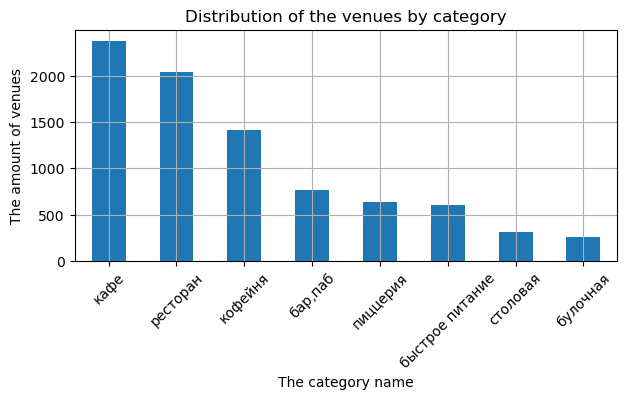

In [52]:
# Creating a matplotlib figure container and set its size
plt.figure(figsize=(7, 3))

# Building the bar chart
df['category'].value_counts().plot(
    kind = 'bar',
    legend = False,
    title = 'Distribution of the venues by category',
    rot = 45
)

# Customizing the chart appearance
plt.grid()
plt.xlabel('The category name')
plt.ylabel('The amount of venues')
plt.show()

We can see that there are 8 categories in total. The most popular ones are cafes/кафе (2,378), restaurants/ресторан (2,043), and coffee shops/кофейня (1,413). The least popular categories are bakeries/булочная (256) and canteens/столовая (315).

### Analyzing venues by administrative districts

Let’s take a look at the venues based on the administrative districts they are located in:


In [55]:
df['district'].value_counts()

district
Центральный административный округ         2242
Северный административный округ             898
Южный административный округ                892
Северо-Восточный административный округ     890
Западный административный округ             850
Восточный административный округ            798
Юго-Восточный административный округ        714
Юго-Западный административный округ         709
Северо-Западный административный округ      409
Name: count, dtype: int64

As we can see, the Central Administrative District/Центральный административный округ stands out with a big lead — it is the most popular one, with 2,242 venues. The least popular is the North-Western Administrative District/Северо-Западный административный округ, with only 409 venues.

The rest of the venues are spread more evenly — about 800 places per district.

Let’s create a visualization to see the gaps and overall distribution across districts more clearly:


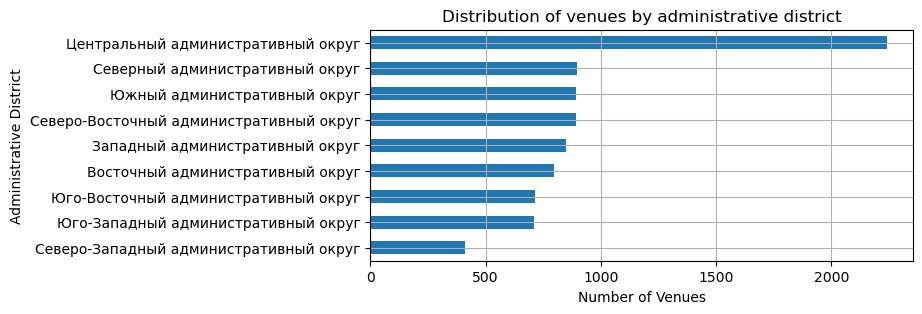

In [57]:
# Create a matplotlib figure container and set its size
plt.figure(figsize=(7, 3))

# Build a horizontal bar chart
df['district'].value_counts().sort_values(ascending=True).plot(
    kind = 'barh',
    legend = False,
    title = 'Distribution of venues by administrative district',
    rot = 0
)
plt.grid()

# Customize chart appearance
plt.ylabel('Administrative District')
plt.xlabel('Number of Venues')
plt.show()


Now we can clearly see the lead of the Central Administrative District compared to other regions.

Let’s take a closer look at it and also find out which categories are popular within the Central Administrative District.


In [59]:
# Let's filter the data by the Central Administrative District
df[df['district'] == 'Центральный административный округ'].groupby('category')['id'].count().sort_values(ascending = False)

category
ресторан           670
кафе               464
кофейня            428
бар,паб            364
пиццерия           113
быстрое питание     87
столовая            66
булочная            50
Name: id, dtype: int64

As we can see, unlike the overall city where the most common category was cafe/кафе, in the Central Administrative District the most popular category is restaurant/ресторан.

Let’s create a visualization to see it more clearly:


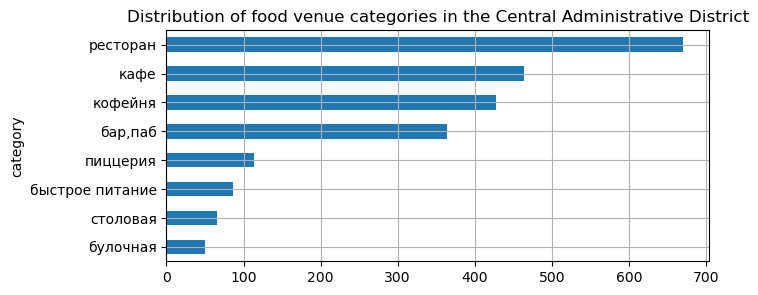

In [74]:
# Create a matplotlib figure container and set its size
plt.figure(figsize=(7, 3))

# Build the visualization
df[df['district'] == 'Центральный административный округ'].groupby('category')['id'].count().sort_values(ascending = True).plot(
    kind = 'barh',
    legend = False,
    title = 'Distribution of food venue categories in the Central Administrative District',
    rot = 0
)
plt.grid()
plt.show()

Indeed, restaurants in this district have a significant lead over other categories.  
But the least popular ones remain the same — bakeries and canteens.


### Analyzing chain and non-chain venues

Let’s see how many venues are part of a chain.

In [77]:
# Group the data based on whether the venue is part of a chain
absolute_value = df.groupby('chain')['id'].count()

# Add relative values (percentages)
percentage = df['chain'].value_counts(normalize=True) * 100
absolute_value, percentage

(chain
 0    5199
 1    3203
 Name: id, dtype: int64,
 chain
 0    61.878124
 1    38.121876
 Name: proportion, dtype: float64)

As we can see, there are many more non-chain venues than chain ones — 62% vs 38%.  Let’s take a look at a chart to visualize this difference:


<Figure size 700x300 with 0 Axes>

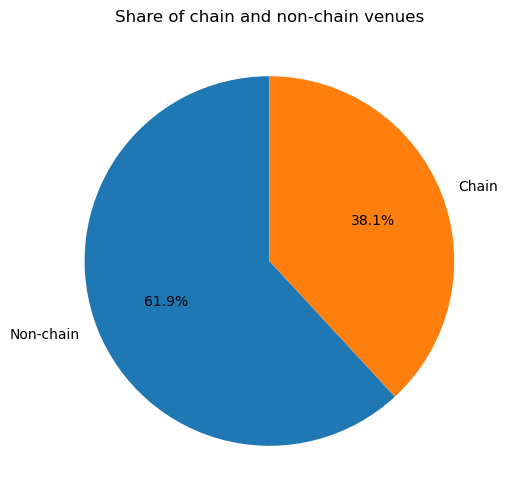

In [80]:
# Create a matplotlib figure container and set its size
plt.figure(figsize=(7, 3))

# Calculate percentage ratio
chain_percentage = df['chain'].value_counts(normalize=True) * 100  

# Define labels for the categories
labels = ['Non-chain', 'Chain']

# Build the pie chart
plt.figure(figsize=(6, 6))  
plt.pie(chain_percentage, labels=labels, autopct='%1.1f%%', startangle=90)

# Add title
plt.title('Share of chain and non-chain venues')

# Show the chart
plt.show()

Now we can clearly see how non-chain venues dominate.

Let’s look at the venue categories based on whether they are part of a chain. This will help us understand which categories are most likely to be chain venues.


In [85]:
# Let's group by categories and if the venue is a part of a chain
df.groupby('category')['chain'].value_counts().unstack(fill_value=0)

chain,0,1
category,,
"бар,паб",596,168
булочная,99,157
быстрое питание,371,232
кафе,1597,779
кофейня,693,720
пиццерия,303,330
ресторан,1313,729
столовая,227,88


In terms of absolute numbers, cafes and restaurants lead both among chain and non-chain venues.  
But since their total number is much higher in the data overall, we need to look at the share (relative values) to better understand the situation.

Let’s build a visualization and take a closer look.

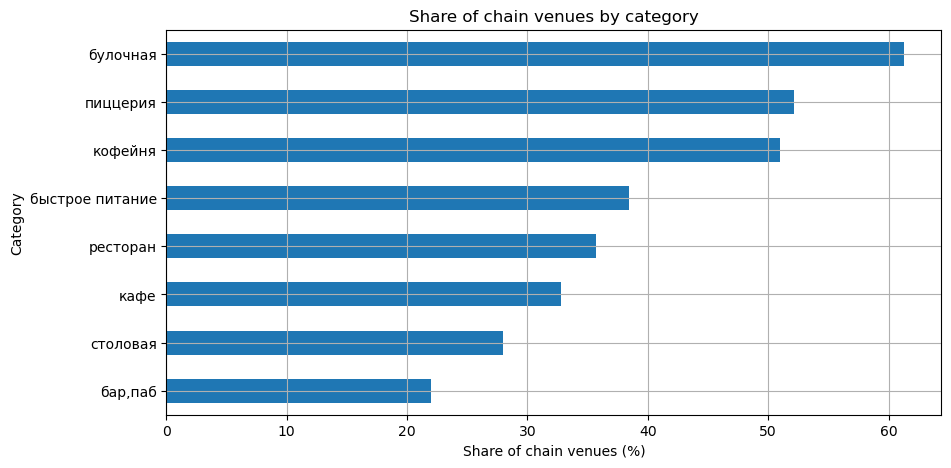

In [88]:
# Create a matplotlib figure container and set its size
plt.figure(figsize=(10, 5))

# Calculate the share of chain venues in each category
category_chain_ratio = df.groupby('category')['chain'].mean() * 100

# Build the chart
category_chain_ratio.sort_values().plot(
    kind='barh',
    title='Share of chain venues by category',
    xlabel='Share of chain venues (%)',
    ylabel='Category',
    grid=True
)

# Show the chart
plt.show()

Even though most chain venues belong to the "cafe" category, bakeries lead in terms of the share of chain vs non-chain places — over 60% of bakeries are part of a chain.  
We can say that bakeries are more likely to be chain venues than any other category.


### Analyzing seating capacity


Let’s explore the number of seats using the `describe` method.


In [ ]:
# Checking stat values
df['seats'].describe()

As we can see, the median (50th percentile — 75) and the mean (108.4) are quite different from each other.  
We also notice a large gap between the 75th percentile (140) and the maximum value (1,288).  
This suggests that there are outliers in the data, so we need to look into these unusual values and decide how to handle them.

Let’s check the distribution of values in the `seats` column by creating a *histogram*.


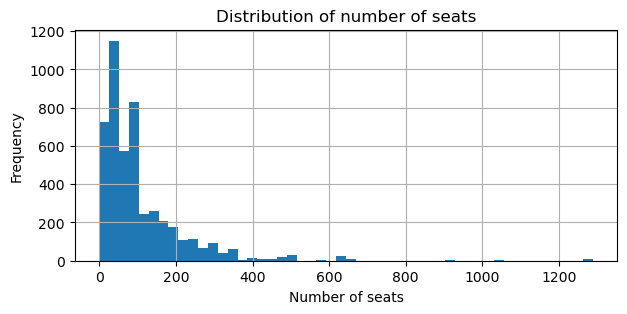

In [94]:
# Create a matplotlib figure container and set its size
plt.figure(figsize=(7, 3))

# Build the histogram chart
df['seats'].plot(
    kind = 'hist',
    title = 'Distribution of number of seats',
    bins = 50,
    ylabel ='Frequency',
    xlabel = 'Number of seats',
    rot = 0
)
plt.grid()

# Show the chart
plt.show()

As we can see from the chart, the distribution is heavily skewed — there’s a long tail to the right.  
This means the data has strong right skew. Since there’s no category like "Banquet Hall" or "Food Court" in the dataset, these high values are likely outliers.  
They are unusual and could negatively affect our further analysis.

Let’s take a closer look at these outliers using a boxplot.


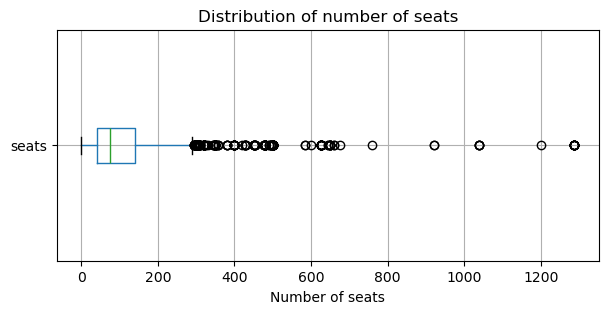

In [97]:
# Create a matplotlib figure container and set its size
plt.figure(figsize=(7, 3))

# Build the boxplot chart
df.boxplot(column = 'seats', vert = False)

# Add title and axis label
plt.title('Distribution of number of seats')
plt.xlabel('Number of seats')

# Show the chart
plt.show()

Indeed, we are dealing with a large number of outliers. Since we already know that the data comes from open sources or was added by users, these outliers are most likely caused by manual input mistakes or technical errors.

Let’s normalize the chart and take a look without the outliers by setting the `showfliers` parameter to `False`:


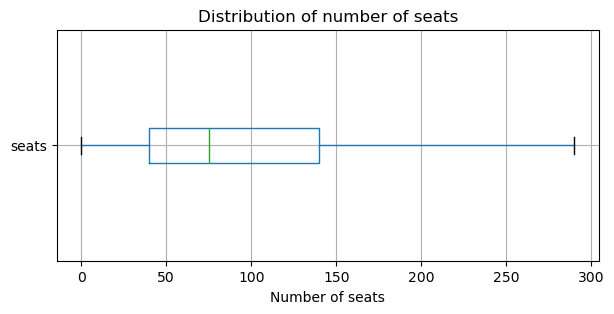

In [100]:
# Create a matplotlib figure container and set its size
plt.figure(figsize=(7, 3))

# Build the boxplot chart
df.boxplot(column = 'seats', vert = False, showfliers=False)

# Add title and axis label
plt.title('Distribution of number of seats')
plt.xlabel('Number of seats')

# Show the chart
plt.show()

Now we can clearly see the median (75) and the observed maximum without outliers, which is around 275.  
We will remove values above this threshold to avoid distorting further analysis.


#### Number of seats by category

Let’s take a look at the median number of seats by venue category to answer the question:  
What is the typical number of seats for each category?

In [105]:
# Let's group our data by categories
df[df['seats'] < 275].groupby('category')['seats'].median().sort_values(ascending = False)

category
ресторан           80.0
бар,паб            74.5
столовая           70.0
кофейня            67.0
быстрое питание    60.0
кафе               53.0
пиццерия           50.0
булочная           48.0
Name: seats, dtype: float64

Restaurants (80 seats) and pubs (75 seats) lead in terms of seating capacity, while bakeries (48 seats) and pizzerias (50 seats) have the least number of seats.

Let’s visualize this and build a bar chart.

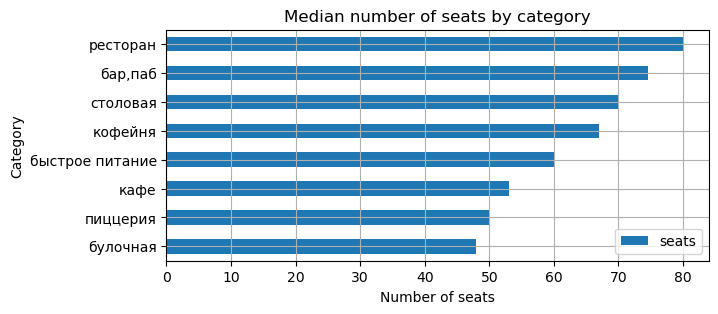

In [108]:
# Create a matplotlib figure container and set its size
plt.figure(figsize=(7, 3))

# Build the bar chart
df[df['seats'] < 275].groupby('category')['seats'].median().sort_values().plot( 
    kind = 'barh',
    title = 'Median number of seats by category',
    legend = True,
    ylabel ='Category',
    xlabel = 'Number of seats',
    rot = 0
)
plt.grid()

# Show the chart
plt.show()

Indeed, restaurants and pubs lead in terms of seating capacity, while bakeries and pizzerias have significantly fewer seats. This is understandable, as people typically don’t spend much time in such places — it’s either a quick bite or delivery in the case of pizzerias. On the other hand, restaurants and bars are places where people tend to spend more time.

### Analyzing venue ratings

Let’s take a look at the ratings column using the `describe` method.

In [113]:
# Let's look at the statistical summary of the ratings column
df['rating'].describe()

count    8402.000000
mean        4.230017
std         0.470320
min         1.000000
25%         4.100000
50%         4.300000
75%         4.400000
max         5.000000
Name: rating, dtype: float64

The data here matches the description — ratings range from 1 to 5. The difference between the mean (4.2) and the median (4.3) is minimal, and the standard deviation is only 0.47.  
This indicates a *normal distribution of data* with no outliers or anomalies.

Similarly to the seating capacity, let’s take a look at the ratings based on the venue categories.

In [116]:
# Let's check the average rating by categories
df.groupby('category')['rating'].mean().sort_values(ascending = False)

category
бар,паб            4.387696
пиццерия           4.301264
ресторан           4.290402
кофейня            4.277282
булочная           4.268359
столовая           4.211429
кафе               4.124285
быстрое питание    4.050249
Name: rating, dtype: float64

As we can see, bars (4.4), pizzerias (4.3), and restaurants (4.3) have a higher average rating compared to other categories, while fast food spots (4.0) and cafes (4.1) have lower ratings.

Let’s visualize this on a chart.

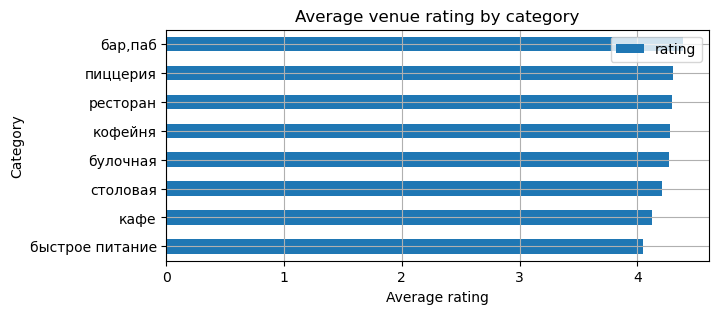

In [120]:
# Create a matplotlib figure container and set its size
plt.figure(figsize=(7, 3))

# Build the bar chart
df.groupby('category')['rating'].mean().sort_values().plot( 
    kind = 'barh',
    title = 'Average venue rating by category',
    legend = True,
    ylabel ='Category',
    xlabel = 'Average rating',
    rot = 0
)
plt.grid()

# Show the chart
plt.show()

For all categories, the average rating is in the range from 4 to 4.4. These ratings don’t differ much and are generally quite good — this may indicate a high quality of venues in Moscow.

### Analyzing correlation between data and ratings

Let’s examine all the data in terms of its correlation with ratings. This will help us form hypotheses about causality and answer the question of how the data relates to the rating.

To understand if there’s a connection between the data points, analysts often use correlation matrices for the features in the data. For this task, the `churn` column is important, so we will study the relationships between the data in this column and other features. 

In Python, the `phik` library is a great tool for exploring the relationships between different types of data, both continuous and categorical.

We can use the `phik` library to analyze the relationship between the rating and other features, as they come from different data types: there are continuous values like the number of seats, and categories like price category and administrative district.

Let’s build the correlation matrix:

In [126]:
# Calculate the correlation matrix using phi_k
correlation_matrix = df[['district', 'category', 'chain', 'seats', 'price',
                         'is_24_7', 'rating']].phik_matrix()

# Display the result
display('Correlation matrix with phi_k coefficient for the rating variable')
correlation_matrix.loc[correlation_matrix.index != 'rating'][['rating']].sort_values(by='rating', ascending=False)

interval columns not set, guessing: ['chain', 'seats', 'rating']


'Correlation matrix with phi_k coefficient for the rating variable'

,rating
price,0.220295
district,0.200761
category,0.189716
is_24_7,0.150365
chain,0.107833
seats,0.000000


We are interested in the relationship between the venue rating and other data, so only the `rating` column from the final correlation matrix `correlation_matrix` has been displayed. The condition `correlation_matrix.loc[correlation_matrix.index != 'rating']` helps to remove the row with the index `'rating'`.

The highest correlation of the rating is observed with data about price (0.22) and administrative district (0.20). The lowest correlation is between the rating and the number of seats.

To visualize the correlation results, let’s use a heatmap with the seaborn library:

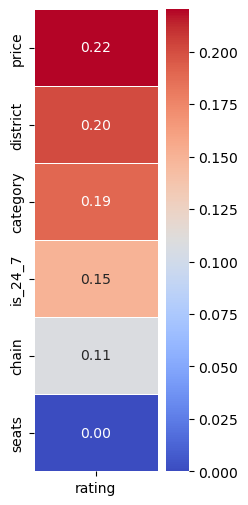

In [129]:
# Create a matplotlib figure container and set its size
plt.figure(figsize=(2, 6))

# Build the heatmap chart using seaborn
data_heatmap = correlation_matrix.loc[correlation_matrix.index != 'rating'][['rating']].sort_values(by='rating', ascending=False)
sns.heatmap(
    data_heatmap,
    annot = True,
    fmt = '.2f',
    cmap = 'coolwarm',
    linewidths=0.5
)

# Show the chart
plt.show()

Now the correlation between the rating and other features is clearly displayed. The strongest relationship is observed between the rating and the price category. Let’s take a closer look at this relationship.

#### Checking the relationship between price and rating

In [133]:
# Let's group the data to check the relations
df.groupby('price')['rating'].mean()

price
высокие          4.436611
выше среднего    4.386348
низкие           4.173077
средние          4.297874
Name: rating, dtype: float64

Let’s visualize this and create a chart.

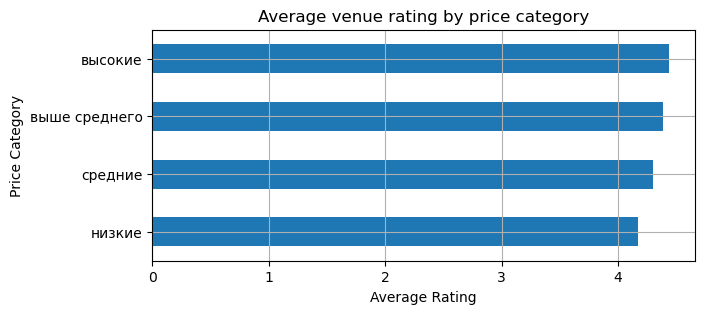

In [136]:
# Create a matplotlib figure container and set its size
plt.figure(figsize=(7, 3))

# Build the bar chart
df.groupby('price')['rating'].mean().sort_values().plot( 
    kind = 'barh',
    title = 'Average venue rating by price category',
    legend = False,
    ylabel ='Price Category',
    xlabel = 'Average Rating',
    rot = 0
)
plt.grid()

# Show the chart
plt.show()

Indeed, it is clear that there is a positive correlation between price and rating. The higher the price, the higher the average rating.

### Top-15 most popular food venues in Moscow

To analyze the popularity of chain restaurants in Moscow, let's create a new dataframe to perform further analysis on it.

In [141]:
# Let's check the top-15 and avg rating
top_15 = df[df['chain'] == 1].groupby(['name', 'category']).agg(name_count = ('name', 'count'), rating_mean = ('rating', 'mean')).sort_values(by = 'name_count', ascending = False).head(15).reset_index()

display('Топ-15 популярных сетей в Москве')
top_15

'Топ-15 популярных сетей в Москве'

,name,category,name_count,rating_mean
0,Шоколадница,кофейня,119,4.178151
1,Домино'с Пицца,пиццерия,76,4.169737
2,Додо Пицца,пиццерия,74,4.286486
3,One Price Coffee,кофейня,71,4.064789
4,Яндекс Лавка,ресторан,69,3.872464
5,Cofix,кофейня,65,4.075385
6,Prime,ресторан,49,4.114286
7,КОФЕПОРТ,кофейня,42,4.147619
8,Кулинарная лавка братьев Караваевых,кафе,39,4.394872
9,Теремок,ресторан,36,4.105556


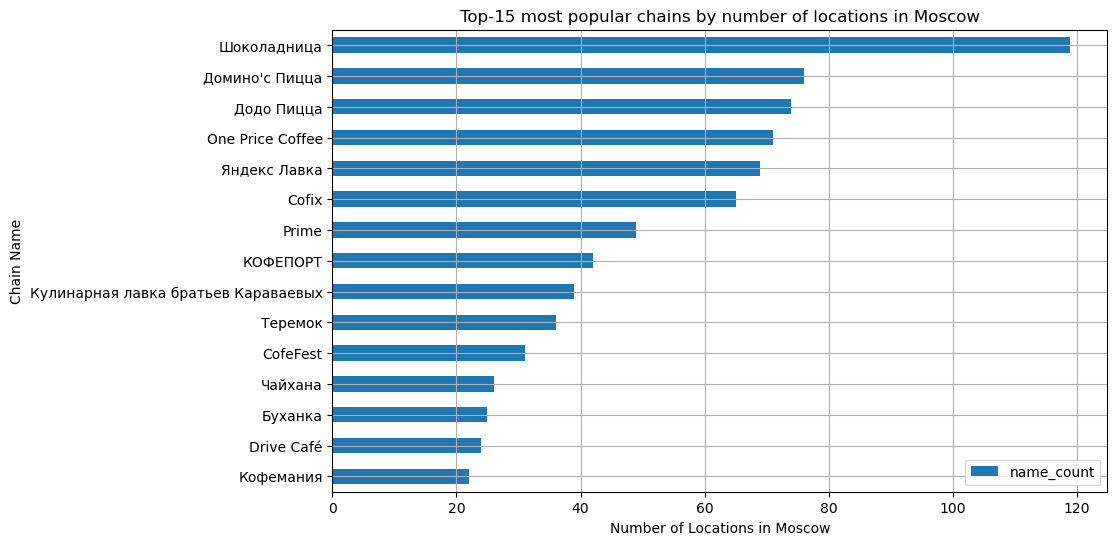

In [143]:
# Create a matplotlib figure container and set its size
plt.figure(figsize=(10, 6))

# Build the bar chart
top_15.set_index('name')['name_count'].sort_values(ascending = True).plot( 
    kind = 'barh',
    title = 'Top-15 most popular chains by number of locations in Moscow',
    legend = True,
    ylabel ='Chain Name',
    xlabel = 'Number of Locations in Moscow',
    rot = 0
)
plt.grid()

# Show the chart
plt.show()

The most popular chain in Moscow is "Shokoladnitsa"/Шоколадница with a significant lead in the number of locations — 119 venues.

Let’s analyze by category to see which category is most common among the most popular chain venues.

In [146]:
# Let’s see which category is the most common among the most popular chain venues.
top_15.groupby('category').agg(category_count = ('category', 'count'), name_sum = ('name_count', 'sum')).sort_values(by = 'category_count', ascending = False)

,category_count,name_sum
category,,
кофейня,6,350
кафе,3,89
ресторан,3,154
пиццерия,2,150
булочная,1,25


Out of the top 15 most popular chains:
* 6 chains are coffee shops (350 venues in total)
* 3 chains are restaurants (154 venues)
* 3 chains are cafes (89 venues)
* 2 chains are pizzerias (150 venues)
* 1 chain is a bakery (25 venues)

Let’s create a visualization.

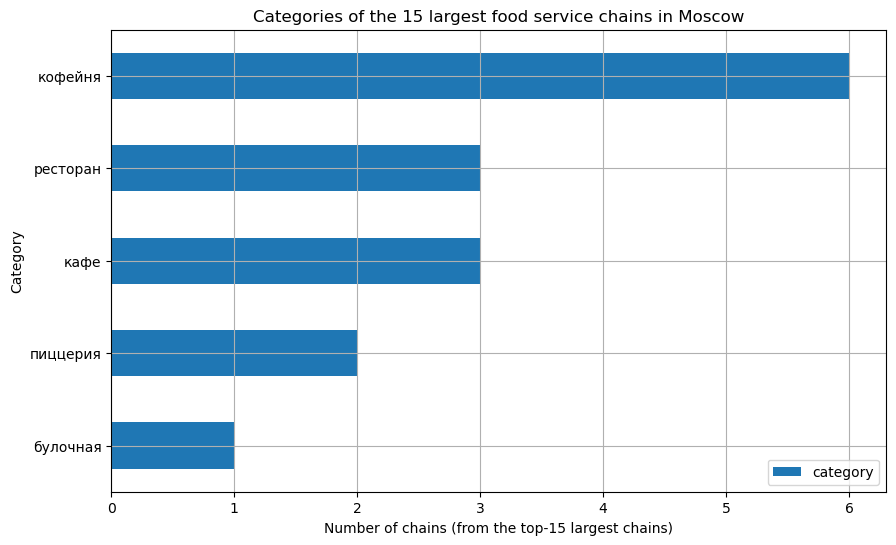

In [149]:
# Create a matplotlib figure container and set its size
plt.figure(figsize=(10, 6))

# Build the bar chart
top_15.groupby('category')['category'].count().sort_values().plot( 
    kind = 'barh',
    title = 'Categories of the 15 largest food service chains in Moscow',
    legend = True,
    ylabel ='Category',
    xlabel = 'Number of chains (from the top-15 largest chains)',
    rot = 0
)
plt.grid()

# Show the chart
plt.show()


The most popular category for the largest chains in Moscow is Coffee Shop, with restaurants and cafes sharing second place.

### Variation of average bill by region

Let’s take a look at the `middle_avg_bill` column, which contains the average bills for the venues, and see how the average bill varies by region in Moscow.

In [154]:
# let's check the stat summary 
df['middle_avg_bill'].describe()

count     3149.000000
mean       958.053668
std       1009.732845
min          0.000000
25%        375.000000
50%        750.000000
75%       1250.000000
max      35000.000000
Name: middle_avg_bill, dtype: float64

We can see that the maximum value (35,000) is much higher than the 75th percentile (1,250), and the median (750) is different from the mean (958).

This is likely not due to outliers, but rather the premium nature of certain venues. We cannot treat the price as an anomalous value, as it could represent the average bill of a high-end restaurant in central Moscow.

Let’s take a look at the average bill by district in Moscow.


In [156]:
# let's group by districts
df.groupby('district')['middle_avg_bill'].mean().sort_values(ascending = False)

district
Центральный административный округ         1191.057547
Западный административный округ            1053.225490
Северный административный округ             927.959627
Южный административный округ                834.398089
Северо-Западный административный округ      822.222930
Восточный административный округ            820.626923
Юго-Западный административный округ         792.561702
Северо-Восточный административный округ     716.611296
Юго-Восточный административный округ        654.097938
Name: middle_avg_bill, dtype: float64

As we can see from the data, the highest average bill is in venues located in the Central Administrative District of Moscow — 1,191 RUB.

The smallest average bill (654 RUB) is in the South-Eastern Administrative District.

Let’s visualize this.

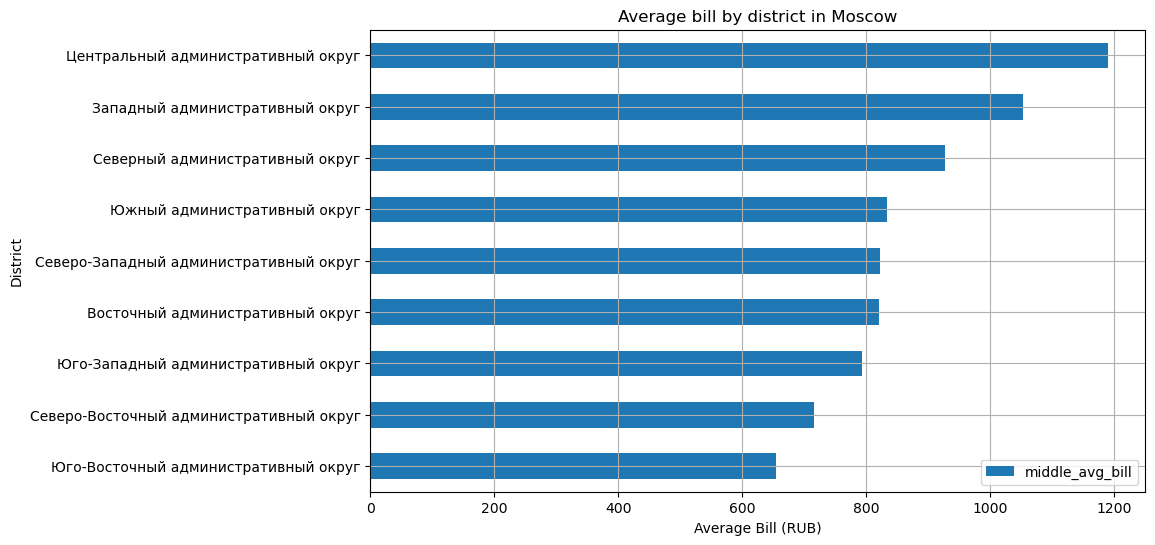

In [159]:
# Create a matplotlib figure container and set its size
plt.figure(figsize=(10, 6))

# Build the bar chart
df.groupby('district')['middle_avg_bill'].mean().sort_values().plot( 
    kind = 'barh',
    title = 'Average bill by district in Moscow',
    legend = True,
    ylabel ='District',
    xlabel = 'Average Bill (RUB)',
    rot = 0
)
plt.grid()

# Show the chart
plt.show()

Indeed, the Central Administrative District outperforms all other areas in terms of average bill, meaning there are more high-end venues in the city center. So, it’s true — the closer a venue is to the center, the more likely it is to have a high average bill.

However, since the other districts are arranged in a circle around the Central District, we cannot conclusively say the opposite — that the further a venue is from the center, the cheaper it is. To test this hypothesis, we would need more data, such as the average bill by district in the Moscow suburbs.

## Step 4. Final Conclusion and Recommendations

#### General overview of the work done

During the work, an exploratory analysis of the public food venue market in Moscow was conducted. Data from two datasets were merged, cleaned from missing values and duplicates, and supplemented with new features. The distribution of venues by category and district was analyzed, the ratio of chain vs non-chain venues was examined, and ratings, seating capacity, and average bill were analyzed. Special attention was given to the impact of location on pricing.

#### Answers to research questions

During the analysis, it was found that, during the summer of 2022, there were 8 types of venues in total. The most common categories across all data are:
* Cafes (2,378 venues)
* Restaurants (2,043 venues)
* Coffee shops (1,413 venues)

However, in the Central Administrative District, the most popular category is Restaurants (670 venues).

Out of all the venues, 38% are chain venues (3,205 venues) and 62% are non-chain venues (5,201 venues). The most popular category in both chain and non-chain venues is cafes (1,599 non-chain and 779 chain venues). **However, bakeries lead in terms of the share of chain venues compared to non-chain ones. It can be said that bakeries are more likely to be part of a chain than any other category. More than 60% of bakeries are chain venues.**

In terms of seating capacity, restaurants (80 seats) and pubs (75 seats) have the most, while bakeries (48 seats) and pizzerias (50 seats) have the least.

For all categories, the average rating ranges from 4.0 to 4.4, with little difference.  
Bars (4.4), pizzerias (4.3), and restaurants (4.3) have higher average ratings compared to other categories, while fast food spots (4.0) and cafes (4.1) have lower ratings.

The strongest correlation with ratings is found with the price category. We discovered that these two values have a positive correlation, meaning the higher the price category, the higher the venue rating.

The top-15 most popular chain venues by the number of locations are:
1. Shokoladnitsa
2. Domino’s Pizza
3. Dodo Pizza
4. One Price Coffee
5. Yandex Lavka
6. Cofix
7. Prime
8. KOFEPART
9. Culinary Lavka of the Karavaev Brothers
10. Teremok
11. CofeFest
12. Chaihana
13. Bukhanika
14. Drive Café
15. Coffeemania

6 of these are coffee shops, and only 1 is a bakery.

The highest average bill is in the Central Administrative District — 1,191 RUB. The second place is taken by the Western Administrative District — 1,053 RUB.  
The lowest average bill is in the South-Eastern Administrative District — 654 RUB.


#### Recommendations based on data analysis

For a successful entry into the foodservice market in Moscow, investors should consider several key factors. The Central Administrative District attracts venues with higher average bills, making it a promising location for restaurants and premium cafes. However, competition here is especially high, and attention should be given to the uniqueness of the concept. In residential areas such as the South-Eastern Administrative District, the average bill is lower, but potentially higher foot traffic can be expected due to more affordable prices.

Chain venues account for 38% of the market, with cafes being the most common category — both among chain and non-chain venues (1,599 non-chain and 779 chain venues). However, bakeries stand out from other categories: more than 60% of them are chain venues, making them leaders in the share of chain venues. This indicates that bakeries are more likely to be developed as chains, in contrast to cafes and restaurants, where non-chain venues dominate.

Opening a chain project could be profitable, especially in the form of bakeries and coffee shops, which demonstrate steady demand and are actively scaling. At the same time, venue ratings are positively correlated with the price category, confirming the importance of thoughtful pricing and high service standards.

The number of seats varies depending on the venue format. For restaurants and pubs, it is important to provide comfortable seating for guests, while pizzerias and bakeries can focus on a smaller seating capacity, emphasizing convenience and speed of service.

Based on the analysis, several strategies can be recommended:

- In premium areas of Moscow, especially in the center, it is profitable to open restaurants with a high average bill, unique menus, and excellent service.
- In residential districts, more affordable cafe, pizzeria, and fast food formats targeting affordable prices and high foot traffic are promising.
- Opening a chain of bakeries and coffee shops could be particularly profitable, as these segments have a high percentage of chain venues and continue to actively grow.
